In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os.path 
from os import listdir
import os, sys

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
from IPython.html import widgets
from PIL import Image

/Users/kellygarcia/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import numpy as np
import math as m
import csv

from numpy import trapz
#from numpy import cumtrapz
#import plotly.plotly as py
#import plotly.graph_objs as go

In [4]:
#this uploads all the .txt files we have for a certain source parameter


path = "/Users/kellygarcia/Google Drive/Test/Text Files/2.4kW 2.0mT/"
dirs = os.listdir(path)
wavelength = []
intensity = []
current = []
magnetic_field = []
for filename in dirs:
    print filename
    reader = csv.reader(open(path + filename, 'r'), delimiter='\n')
    result = np.array(list(reader))
    for i in range(0,len(result)):
        p = result[i]
        dat = p[0].split()
        w = float(dat[0])
        i = float(dat[1])
        c = float(dat[2])
        m = float(dat[3])
        wavelength.append(w)
        intensity.append(i)
        current.append(c)
        magnetic_field.append(m)
                
len(wavelength)
# we have assigned all the appropriate elements in a designated list


Icon
Port3 2.4kW 25sccm 2.0mT Forward 2017-08-27 no avg.txt
Port3 2.4kW 25sccm 2.0mT Reverse 2017-08-27 no avg.txt


72960

In [8]:
#we want to make the lists made above into nested lists where this list's new elements are lists of 3648 elements

new_wavelength = [wavelength[i:i+3648] for i in range(0, len(wavelength), 3648)]
new_intensity = [intensity[i:i+3648] for i in range(0,len(intensity), 3648)]
new_b = [magnetic_field[i:i+3648] for i in range(0,len(magnetic_field), 3648)]
new_c = [current[i:i+3648] for i in range(0,len(current), 3648)]

print len(new_wavelength), len(new_intensity), len(new_b)
#this is the number of lists with 3648 elements

20 20 20


In [24]:
wavelength[1]

331.26

In [6]:
#this is a check to confirm that the i-th element in each new_b or new_c nested list is the expected successive
#magnetic field and current

ew = []
ew1 = []
for i in range(0, len(new_b)):
    a = new_b[i][4]
    b = new_c[i][1]
    ew.append(a)
    ew1.append(b)
len(ew), ew, ew1

#This is essentially a list telling us what magnetic field/current scan we did for this source parameter

(20,
 [1216.0,
  1246.15,
  1276.3,
  1306.45,
  1336.6,
  1366.75,
  1396.9,
  1427.05,
  1457.2,
  1487.35,
  1487.35,
  1457.2,
  1427.05,
  1396.9,
  1366.75,
  1336.6,
  1306.45,
  1276.3,
  1246.15,
  1216.0],
 [400.0,
  410.0,
  420.0,
  430.0,
  440.0,
  450.0,
  460.0,
  470.0,
  480.0,
  490.0,
  490.0,
  480.0,
  470.0,
  460.0,
  450.0,
  440.0,
  430.0,
  420.0,
  410.0,
  400.0])

In [38]:
#new_wavelength[1].index(331.26)
new_wavelength[1][3050]

929.6

In [41]:
#let's integrate over the wavelength to get the total light intensity emission (this is what our eyes do!)
#let's try with a for loop!

import scipy.integrate as integrate #thought we needed this but I didn't use it- feel free to use it in your code :)

#in this example we only have port 3, however, sometimes we have multiple data sets at different ports- hence why
#there is an ion_1 and neu_1 lists since I last had data from port 1 at a different source parameter


ion_1 = []
neu_1 = []

ion_3 = []
neu_3 = []

for i in range(0, len(new_wavelength)):
    x = new_wavelength[i]
    y = new_intensity[i]
    ion = np.trapz(y[85:1025],x[85:1025]) #ions blue; bounds: 350.19nm and 550.61nm
    neu = np.trapz(y[1550:3050],x[1550:3050]) #neutrals pink/orange; bounds: 654.59nm and 929.6nm
    ion_3.append(ion)
    neu_3.append(neu)
    
#this loop takes the i-th list and integrates over the specified wavelengths for ions and neutrals.
#the value that we get is an integrated intensity over those values and the resulting list we have
#is the range of i in the for loop

In [73]:
ion_1, ion_3, neu_1, neu_3

#we expect that the integrated intensity is larger than the raw intensities collected and this is confirmed below:

([],
 [334676.13839999912,
  325597.42629999912,
  317581.71139999921,
  295264.75929999922,
  278089.46469999931,
  121996.5280499998,
  126837.78514999981,
  130693.93664999976,
  128129.51799999976,
  123738.5907999998,
  123055.7231499998,
  120464.39134999982,
  117868.17199999985,
  116962.24664999983,
  119938.23884999979,
  279864.1463499993,
  295316.21149999922,
  303047.30829999922,
  315017.17199999921,
  325277.1287499991],
 [],
 [312666.02865000034,
  311684.7168000004,
  310961.97065000038,
  308246.96745000035,
  303958.73450000043,
  224077.8996000003,
  227683.09070000026,
  228505.22500000024,
  223901.49090000027,
  219408.43730000028,
  218950.03580000025,
  219931.93875000023,
  222519.17585000026,
  222685.12880000027,
  223890.01660000029,
  306275.15260000038,
  310927.02005000034,
  312800.79260000039,
  316355.81190000044,
  318714.39570000034])

In [78]:
#Now let's normalize! In this method, I will take the maximum value in each data set and divide all numbers by the max
#Normalization allows us to better compare the relative amounts of ions to neutrals in the plots below.
#The new lists that are produced are scaled from 0 to 1 from this division.

pt = [3]
norm_ionf = []
norm_neuf = []
norm_ionr = []
norm_neur = []
for i in pt:
    ionn = 'ion_'+str(i)
    nneu = 'neu_'+str(i)
    imaxf = max(eval(ionn)[:len(ew)/2])
    imaxr = max(eval(ionn)[len(ew)/2:])
    nmaxf = max(eval(nneu)[:len(ew)/2])
    nmaxr = max(eval(nneu)[len(ew)/2:])
    for i in range(0,len(ew)/2):
        norm_ionf.append(eval(ionn)[:len(ew)/2][i]/imaxf)
        norm_neuf.append(eval(nneu)[:len(ew)/2][i]/nmaxf)
        norm_ionr.append(eval(ionn)[len(ew)/2:][i]/imaxr)
        norm_neur.append(eval(nneu)[len(ew)/2:][i]/nmaxr)

In [85]:
norm_ionf, norm_neur

([1.0,
  0.97287314194730767,
  0.94892248045610905,
  0.88224024787540689,
  0.83092109891512966,
  0.36452114164228722,
  0.37898663990919329,
  0.39050867885237944,
  0.38284629018535399,
  0.36972636110707596],
 [0.68697880846930315,
  0.69005963243975299,
  0.69817736146268472,
  0.69869805633006121,
  0.70247851876368839,
  0.9609705640290287,
  0.97556628832878289,
  0.98144544714708681,
  0.99259969479941534,
  1.0])

done


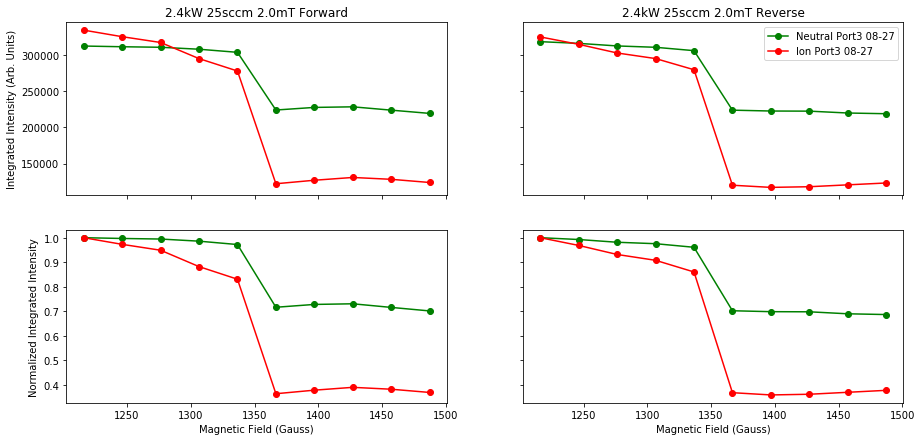

In [126]:
#to make the interesting plot below, we use a special module called subplots
#for aesthetic purposes, I want the plots to share the y-axis... here we go!

#here are the 4 different subplots we must assign to a position and alter their sizes
fg, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,7) )

#ax1 is left-top, ax2 is right-top, ax3 is left-bottom, and ax-4 is right-bottom

#for ax1 and ax3, I want to show the forward transition... going through the previous lists you will see
#that this means I have to use the first half of the list. This is only applicable for the lists we did NOT 
#separate earlier between forward and reverse (we did this only when normalizing). Notice that I simply re-used 
#the ew lists out of convenience to get our x-axis

#for ax2 and ax4, I will show the reverse transition... this means I need the 2nd half of the list. Accordingly, 
#I indexed what I wanted. Please read through the code below and try to understand and even play around with 
#how to call the data we want. This code again is tentative and is subject to change depending on the source
#parameter used since we sometimes use multiple ports but in this example we use only port 3


#ax1.plot(ew[0:],neu_1,'-o',color='b',label='Neutral Port1 8-19')
ax1.plot(ew[:len(ew)/2],neu_3[:len(ew)/2],'-o',color='g',label='Neutral Port3 '+ filename[38:43])
#ax1.plot(ew[0:len(ew)/5],ion_1,'-o', color='purple', label='Ion Port1 8-19')
ax1.plot(ew[:len(ew)/2],ion_3[:len(ew)/2],'-o', color='red', label='Ion Port3 ' + filename[38:43])
ax1.set_ylabel('Integrated Intensity (Arb. Units)')
#ax1.legend()
#ax1.set_title(s_title)
ax1.set_title(filename[6:25] + 'Forward')


ax3.plot(ew[len(ew)/2:][::-1],norm_neuf,'-o',color='g',label='Neutral Port3 ' + filename[38:43])
#ax2.plot(ew[0:len(ew)/5]::-1,norm_ion[0:len(ew)/5],'-o', color='purple', label='Ion Port1 8-19')
ax3.plot(ew[len(ew)/2:][::-1],norm_ionf,'-o', color='red', label='Ion Port3 ' + filename[38:43])
#ax3.legend() 
ax3.set_ylabel('Normalized Integrated Intensity')
ax3.set_xlabel('Magnetic Field (Gauss)')

ax2.plot(ew[len(ew)/2:],neu_3[len(ew)/2:],'-o',color='g',label='Neutral Port3 '+ filename[38:43])
ax2.plot(ew[len(ew)/2:],ion_3[len(ew)/2:],'-o', color='red', label='Ion Port3 ' + filename[38:43])
#ax3.set_ylabel('Integrated Intensity (Arb. Units)')
ax2.legend()
ax2.set_title(filename[6:25] + 'Reverse')

ax4.plot(ew[len(ew)/2:],norm_neur,'-o',color='g',label='Neutral Port3 ' + filename[38:43])
ax4.plot(ew[len(ew)/2:],norm_ionr,'-o', color='red', label='Ion Port3 ' + filename[38:43])
#ax4.legend() 
ax4.set_xlabel('Magnetic Field (Gauss)')

plt.savefig('/Users/kellygarcia/Google Drive/Test/' + filename[6:25]  + ' Integrated Intensity.png')
print 'done'

# 

In [129]:

#trapezoidal uses straight lines --> result is approximate
#simpson's rule uses parabolic --> result is accurate